In [1]:
import findspark
findspark.init('/usr/local/spark2_0/')

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder.appName('final_v1').getOrCreate()

In [4]:
acc = spark.read.csv('../dataset/Acc.csv', inferSchema=True, header=True)
veh = spark.read.csv('../dataset/Veh.csv', inferSchema=True, header=True)
cas = spark.read.csv('../dataset/Cas.csv', inferSchema=True, header=True)

acc.cache()
veh.cache()
cas.cache()

DataFrame[Accident_Index: string, Vehicle_Reference: int, Casualty_Reference: int, Casualty_Class: int, Sex_of_Casualty: int, Age_of_Casualty: int, Age_Band_of_Casualty: int, Casualty_Severity: int, Pedestrian_Location: int, Pedestrian_Movement: int, Car_Passenger: int, Bus_or_Coach_Passenger: int, Pedestrian_Road_Maintenance_Worker: int, Casualty_Type: int, Casualty_Home_Area_Type: int, Casualty_IMD_Decile: int]

In [5]:
#describe accident variables
acc.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Accident_Index,129982,Infinity,NaN,2017010001708,2017984122617
Location_Easting_OSGR,129963,451170.2567192201,95152.62973863313,73639,655391
Location_Northing_OSGR,129963,283578.4101936705,153491.81260740428,12107,1177531
Longitude,129963,-1.2683846916038848,1.395880993558725,-0.000011,NULL
Latitude,129963,52.43938746629935,1.382507825970026,49.929558,NULL
Police_Force,129982,28.527996184087026,25.064407477814147,1,98
Accident_Severity,129982,2.800849348371313,0.43044079855851514,1,3
Number_of_Vehicles,129982,1.8381468203289686,0.7224789075747201,1,23
Number_of_Casualties,129982,1.315512917173147,0.7654693516300957,1,42


In [6]:
#describe vehicle variables
veh.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Accident_Index,238926,Infinity,NaN,2017010001708,2017984122617
Vehicle_Reference,238926,1.5620150172019789,0.7822307839988578,1,101
Vehicle_Type,238926,9.906184341595306,10.60243893161358,-1,98
Towing_and_Articulation,238926,0.014745151218368868,0.357575765821521,-1,5
Vehicle_Manoeuvre,238926,12.425035366598863,6.403464064760207,-1,18
Vehicle_Location-Restricted_Lane,238926,0.16802692046909923,1.1633739332892468,-1,9
Junction_Location,238926,2.2551082762026735,3.0212200860246523,-1,8
Skidding_and_Overturning,238926,0.19772649272159581,0.8280501623608185,-1,5
Hit_Object_in_Carriageway,238926,0.31228497526430776,1.6509397619176822,-1,12


In [7]:
#describe casualtiy variables
cas.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Accident_Index,170993,Infinity,NaN,2017010001708,2017984122617
Vehicle_Reference,170993,1.4821659366172883,0.6565785575715686,1,101
Casualty_Reference,170993,1.3972852689876194,1.1258482444660893,1,201
Casualty_Class,170993,1.4991549361669776,0.7269352286875067,1,3
Sex_of_Casualty,170993,1.4066423771733345,0.49217189892377966,-1,2
Age_of_Casualty,170993,36.50392121314908,19.28372135898287,-1,100
Age_Band_of_Casualty,170993,6.29824612703444,2.3773778609361216,-1,11
Casualty_Severity,170993,2.8338119104290818,0.3994272902672059,1,3
Pedestrian_Location,170993,0.7557326908119045,2.1191736365347413,0,10


In [8]:
#Konten:
#1. Tren Kecelakaan
#2. Korban dan Faktor Kecelakaan
#3. Lokasi Kecelakaan
#4. Kondisi Kendaraan

In [9]:
######################### 1. TREN KECELAKAAN

In [10]:
from pyspark.sql.functions import *

In [11]:
acc2 = acc.withColumn('Date2', to_date(col('Date'), format='dd/MM/yyyyy'))

In [12]:
acc2 = acc2.withColumn('year', year(col('Date2')))
acc2 = acc2.withColumn('month', month(col('Date2')))
acc2 = acc2.withColumn('dayofmonth', dayofmonth(col('Date2')))

In [13]:
acc2.printSchema()

root
 |-- Accident_Index: string (nullable = true)
 |-- Location_Easting_OSGR: integer (nullable = true)
 |-- Location_Northing_OSGR: integer (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Police_Force: integer (nullable = true)
 |-- Accident_Severity: integer (nullable = true)
 |-- Number_of_Vehicles: integer (nullable = true)
 |-- Number_of_Casualties: integer (nullable = true)
 |-- Date: string (nullable = true)
 |-- Day_of_Week: integer (nullable = true)
 |-- Time: string (nullable = true)
 |-- Local_Authority_(District): integer (nullable = true)
 |-- Local_Authority_(Highway): string (nullable = true)
 |-- 1st_Road_Class: integer (nullable = true)
 |-- 1st_Road_Number: integer (nullable = true)
 |-- Road_Type: integer (nullable = true)
 |-- Speed_limit: integer (nullable = true)
 |-- Junction_Detail: integer (nullable = true)
 |-- Junction_Control: integer (nullable = true)
 |-- 2nd_Road_Class: integer (nullable = true)
 |-

In [14]:
acc2.select('Date2','year','month','dayofmonth').show(3)

+----------+----+-----+----------+
|     Date2|year|month|dayofmonth|
+----------+----+-----+----------+
|2017-08-05|2017|    8|         5|
|2017-01-01|2017|    1|         1|
|2017-01-01|2017|    1|         1|
+----------+----+-----+----------+
only showing top 3 rows



In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

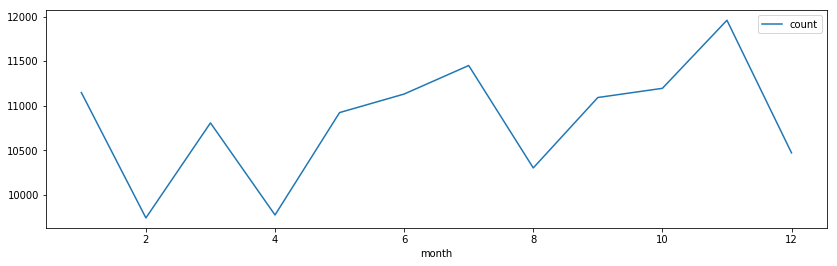

In [16]:
# tren kecelakaan berdasarkan bulan
month_df = acc2.groupBy('month').count().sort('month')
month_df.toPandas().plot(kind='line', x='month', figsize=(14,4))

In [17]:
# berdasarkan grafik line diketahui kecelakaan paling banyak terjadi di bulan 11 dan paling rendah di bulan 2 dan 4

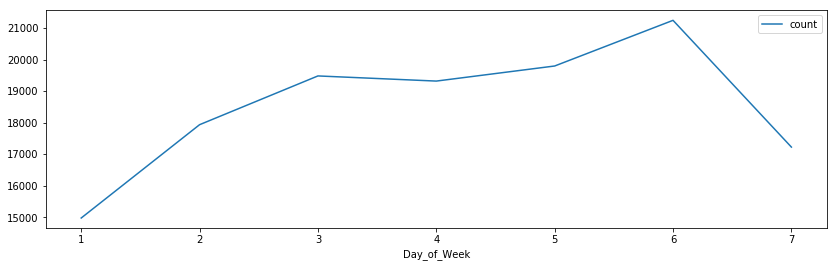

In [18]:
# tren berdasarkan hari
# 1	Sunday
# 2	Monday
# 3	Tuesday
# 4	Wednesday
# 5	Thursday
# 6	Friday
# 7	Saturday

Day_of_Week_df = acc2.groupBy('Day_of_Week').count().sort('Day_of_Week')
Day_of_Week_df.toPandas().plot(kind='line', x='Day_of_Week', figsize=(14,4))

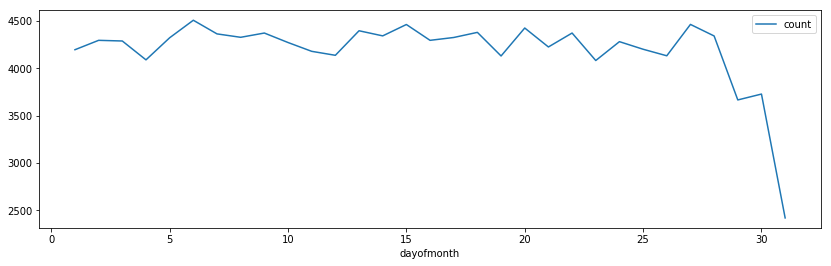

In [19]:
dayofmonth_df = acc2.groupBy('dayofmonth').count().sort('dayofmonth')
dayofmonth_df.toPandas().plot(kind='line', x='dayofmonth', figsize=(14,4))

In [20]:
# Kecelakaan paling banyak terjadi hari jumat (mungkin banyak yang berlibur setelah senin-jumat berkerja)
# kecelakan rendah di akhir bulan mungkin karena uangnya habis dan nunggu gajian :D

In [21]:
split_ = split(col('Time'), ':')
acc2 = acc2.withColumn('hour', split_.getItem(0)).withColumn('minute', split_.getItem(1))

In [22]:
acc2.select('Time','hour','minute').show(3)

+-----+----+------+
| Time|hour|minute|
+-----+----+------+
|03:12|  03|    12|
|01:30|  01|    30|
|00:30|  00|    30|
+-----+----+------+
only showing top 3 rows



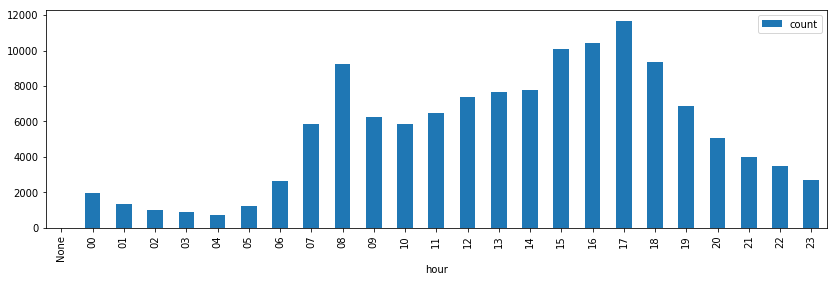

In [23]:
hour_df = acc2.groupBy('hour').count().sort('hour')
hour_df.toPandas().plot(kind='bar', x='hour', figsize=(14,4))

In [24]:
# kecelakaan sering terjadi pada jam pulang kantor antara pukul 15-19 
# hal ini menguatkan statement kecelakaan paling banyak terjadi pada hari jumat 
# karena banyak yang keluar berlibur pada sore hari setelah bekerja 

In [25]:
######################### 2. Korban dan Faktor Kecelakaan

In [26]:
# jumlah korban
Number_of_Casualties_df = acc2.groupBy('Number_of_Casualties').count().sort('Number_of_Casualties').limit(10)
Number_of_Casualties_df.show()

+--------------------+------+
|Number_of_Casualties| count|
+--------------------+------+
|                   1|102480|
|                   2| 19012|
|                   3|  5460|
|                   4|  1934|
|                   5|   673|
|                   6|   261|
|                   7|    81|
|                   8|    30|
|                   9|    16|
|                  10|    17|
+--------------------+------+



In [27]:
# Paling banyak korban dari setiap kecelakaan adalah 1 orang. 
# Bisa jadi kecelakaan tunggal atau kendaraan hanya berisi sedikit orang (< 2 orang)   

In [28]:
Number_of_Vehicles_df = acc2.groupBy('Number_of_Vehicles').count().sort('count', ascending=False).limit(10)
Number_of_Vehicles_df.show()

+------------------+-----+
|Number_of_Vehicles|count|
+------------------+-----+
|                 2|77452|
|                 1|39046|
|                 3|10336|
|                 4| 2311|
|                 5|  552|
|                 6|  169|
|                 7|   62|
|                 8|   20|
|                 9|   16|
|                10|   10|
+------------------+-----+



In [29]:
# kecelakaan paling banyak disebabkan oleh 2 kendaraan (bisa karena tabrakan 2 kendaraan)
# kecelakaan tunggal menempati urutan kedua (bisa karena kondisi jalan atau drivernya)

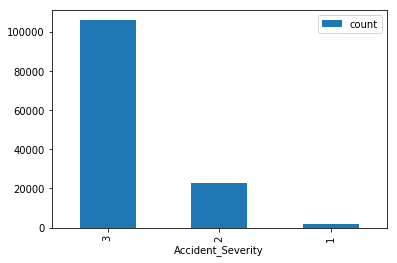

In [30]:
# tingkat kecelakaan
# 1	Fatal
# 2	Serious
# 3	Slight

Accident_Severity_df = acc2.groupBy('Accident_Severity').count().sort('count', ascending=False)
Accident_Severity_df.toPandas().plot(kind='bar', x='Accident_Severity')

In [31]:
# kebanyakan kecelakaan hanya kecelakaan ringan. kecelakaan fatal hanya sedikit terjadi 

AxesSubplot(0.125,0.125;0.775x0.755)


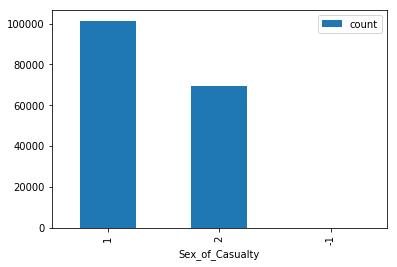

In [32]:
# jenis kelamin korban
# 1	Male
# 2	Female
# -1	Data missing or out of range


Sex_of_Casualty_df = cas.groupBy('Sex_of_Casualty').count().sort('count', ascending=False)
print(Sex_of_Casualty_df.toPandas().plot(kind='bar', x='Sex_of_Casualty'))


In [33]:
Age_Band_of_Casualty_df = cas.groupBy('Age_Band_of_Casualty').count().sort('Age_Band_of_Casualty')

In [34]:
age_band = spark.read.csv('../dataset/Veh/age_band.csv', inferSchema=True, header=True)

In [35]:
age_band_join = Age_Band_of_Casualty_df.join(age_band, (Age_Band_of_Casualty_df.Age_Band_of_Casualty==age_band.code))

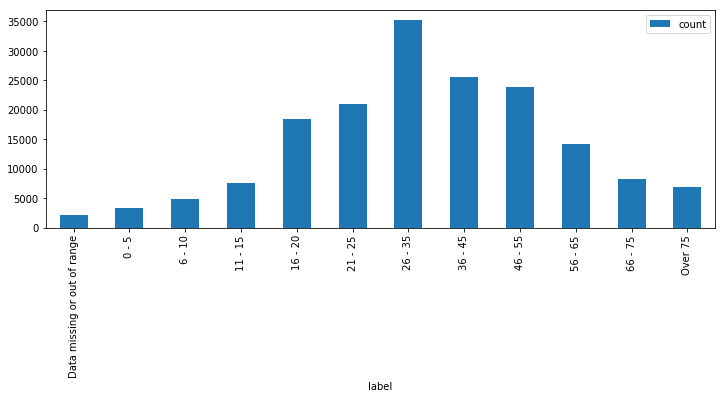

In [36]:
#distribusi korban

age_band_join.select('label','count').toPandas().plot(kind='bar', x='label', figsize=(12,4))

In [37]:
# korban kecelakaan paling banyak adalah laki-laki dan berumur 26 - 35 tahun
# masih punya darah muda dan suka kebut2an (maybe)

In [38]:
# 1	Driver or rider
# 2	Passenger
# 3	Pedestrian

Casualty_Class_df = cas.groupBy('Casualty_Class').count().sort('Casualty_Class')
Casualty_Class_df.show()

+--------------+------+
|Casualty_Class| count|
+--------------+------+
|             1|109446|
|             2| 37742|
|             3| 23805|
+--------------+------+



In [39]:
# sebagaian besar korban kecelakaan adalah driver itu sendiri

In [159]:
journey_purpose = spark.read.csv('../dataset/Veh/journey_purpose.csv', inferSchema=True, header=True)

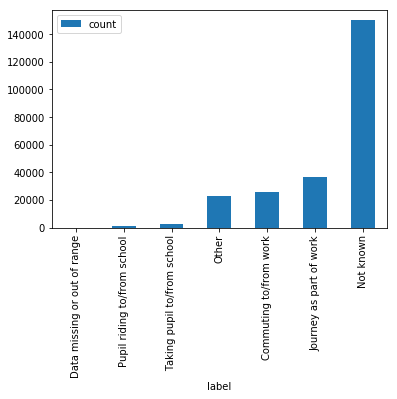

In [164]:
journey_purpose_df = veh.groupBy('Journey_Purpose_of_Driver').count().sort('count')
journey_join = journey_purpose_df.join(journey_purpose, (journey_purpose_df.Journey_Purpose_of_Driver==journey_purpose.code))
journey_join.select('label','count').toPandas().plot(kind='bar', x='label')

In [ ]:
# korban kecelakaan sebagaian besar tidak diketahui mempunyai tujuan kemana, tetapi banyak juga yang dalam perjalanan kerja

In [40]:
# apakah kecelakaan disebabkan cuaca? 
weather = spark.read.csv('../dataset/Veh/weather.csv', inferSchema=True, header=True)

In [41]:
Weather_Conditions_df = acc2.groupBy('Weather_Conditions').count().sort('count', ascending=False)
Weather_Conditions_df.join(weather, (Weather_Conditions_df.Weather_Conditions==weather.code)).select('label','count').show()

+--------------------+------+
|               label| count|
+--------------------+------+
|  Fine no high winds|104710|
|Raining no high w...| 14300|
|             Unknown|  4590|
|               Other|  2674|
|   Fine + high winds|  1241|
|Raining + high winds|  1102|
|Snowing no high w...|   641|
|         Fog or mist|   624|
|Snowing + high winds|    99|
|Data missing or o...|     1|
+--------------------+------+



In [42]:
# kecelakaan sebagaian besar tidak terjadi karena keadaan cuaca seperti hujan / angin kencang

In [43]:
# apakah kecelakaan disebabkan kondisi jalan? 

In [44]:
road_surface = spark.read.csv('../dataset/Veh/road_surface.csv', inferSchema=True, header=True)

In [45]:
Road_Surface_Conditions_df = acc2.groupBy('Road_Surface_Conditions').count().sort('count', ascending=False)
Road_Surface_Conditions_df.join(road_surface, (Road_Surface_Conditions_df.Road_Surface_Conditions==road_surface.code)).select('label','count').show()

+--------------------+-----+
|               label|count|
+--------------------+-----+
|                 Dry|92628|
|         Wet or damp|32564|
|        Frost or ice| 2319|
|Data missing or o...| 1937|
|                Snow|  428|
|Flood over 3cm. deep|  106|
+--------------------+-----+



In [46]:
# sebagaian besar terjadi saat jalan kering disusul oleh kondisi jalan basah/lembab dengan perbandingan 1/3 
# dapat disimpulkan sebagaian besar bukan karena kondisi jalan maupun cuaca

In [72]:
# apakah karena kondisi penerangan jalan?

light_conds = spark.read.csv('../dataset/Veh/light_conditions.csv', inferSchema=True, header=True)


In [73]:
Light_Conditions_df = acc2.groupBy('Light_Conditions').count().sort('count', ascending=False)
Light_Conditions_df.join(light_conds, (Light_Conditions_df.Light_Conditions==light_conds.code)).select('label','count').show()


+--------------------+-----+
|               label|count|
+--------------------+-----+
|            Daylight|92678|
|Darkness - lights...|26847|
|Darkness - no lig...| 6678|
|Darkness - lighti...| 2849|
|Darkness - lights...|  929|
|Data missing or o...|    1|
+--------------------+-----+



In [74]:
# kebanyakan kecelakaan terjadi di siang hari, kalaupun malam ada pencahayaan lampu di jalan.. 
# semakin menguatkan banyak kecelakaan terjadi akibat dari kesalahan driver

In [47]:
special_conds = spark.read.csv('../dataset/Veh/special_conditions.csv', inferSchema=True, header=True)

In [48]:
Special_Conditions_at_Site_df = acc2.groupBy('Special_Conditions_at_Site').count().sort('count', ascending=False)
Special_Conditions_at_Site_df.join(special_conds, (Special_Conditions_at_Site_df.Special_Conditions_at_Site==special_conds.code)).select('label','count').show()

+--------------------+------+
|               label| count|
+--------------------+------+
|                None|125040|
|Data missing or o...|  2206|
|           Roadworks|  1352|
|                 Mud|   375|
|Auto traffic sign...|   308|
|       Oil or diesel|   270|
|Road surface defe...|   208|
|Road sign or mark...|   159|
|Auto signal part ...|    64|
+--------------------+------+



In [49]:
# banyak dari kecelakaan tidak diketahui / missing apakah karena ada kondisi khusus, 
# Roadworks/ perbaikan jalan menyumbang faktor terjadinya kecelakaan lebih besar dari lainnya
# kondisi jalan yang mengandung oli, lumpur tidak terlalu menyumbang faktor kecelakaan 

In [50]:
# join data cas & acc
cas_acc = cas.join(acc, on='Accident_Index', how='left')

In [116]:
# join data acc & vehicle
acc_veh = acc.join(veh, on='Accident_Index', how='left')

In [51]:
# apakah faktor yang menyebabkan kecelakaan sedikit juga memberikan korban yang sedikit pula?

In [52]:
cas_acc.createOrReplaceTempView('cas_acc')

In [119]:
acc_veh.createOrReplaceTempView('acc_veh')

In [53]:
# Special_Conditions_at_Site=4 / roadworks
special_conds_roadworks = spark.sql("select Casualty_Severity, count('Casualty_Severity') as jumlah \
            from cas_acc \
            where Special_Conditions_at_Site=4 \
            group by Casualty_Severity \
            order by Casualty_Severity ")

# Special_Conditions_at_Site=6 / oil or diesel
special_conds_oil = spark.sql("select Casualty_Severity, count('Casualty_Severity') as jumlah \
            from cas_acc \
            where Special_Conditions_at_Site=6 \
            group by Casualty_Severity \
            order by Casualty_Severity")

print(special_conds_roadworks.show())
print(special_conds_oil.show())

# 1	Fatal
# 2	Serious
# 3	Slight


+-----------------+------+
|Casualty_Severity|jumlah|
+-----------------+------+
|                1|    16|
|                2|   216|
|                3|  1613|
+-----------------+------+

None
+-----------------+------+
|Casualty_Severity|jumlah|
+-----------------+------+
|                1|     1|
|                2|    72|
|                3|   311|
+-----------------+------+

None


In [54]:
# ternyata faktor2 spesial tidak memberikan dampak fatal pada kecelakaan.. sebagaian besar adalah kecelakaan ringan

In [55]:
carriageway_hazards = spark.read.csv('../dataset/Veh/carriageway_hazards.csv', inferSchema=True, header=True)

In [56]:
Carriageway_Hazards_df = acc2.groupBy('Carriageway_Hazards').count().sort('count', ascending=False)
Carriageway_Hazards_df.join(carriageway_hazards, (Carriageway_Hazards_df.Carriageway_Hazards==carriageway_hazards.code)).select('label','count').show()

+--------------------+------+
|               label| count|
+--------------------+------+
|                None|125508|
|Data missing or o...|  2073|
|Other object on road|  1224|
|Any animal in car...|   477|
|Pedestrian in car...|   254|
|Vehicle load on road|   252|
|   Previous accident|   194|
+--------------------+------+



In [57]:
# salah satu faktor kecelakaan adalah karena adanya objek di jalan. seperti ada kendaraan dari arah berlawanan atau pejalan kaki

In [61]:
######################### 3. Lokasi Kecelakaan

In [65]:
# lokasi kecelakaan

Urban_or_Rural_Area_df = acc.groupBy('Urban_or_Rural_Area').count().sort('Urban_or_Rural_Area')
Urban_or_Rural_Area_df.show()

# 1	Urban
# 2	Rural
# 3	Unallocated



+-------------------+-----+
|Urban_or_Rural_Area|count|
+-------------------+-----+
|                  1|87450|
|                  2|42522|
|                  3|   10|
+-------------------+-----+



In [66]:
# kecelakaan paling banyak terjadi di perkotaan, tetapi angka kecelakaan di desa juga besar (setengah dari di perkotaan)

In [85]:
print(acc2.groupBy('Pedestrian_Crossing-Human_Control').count().sort('Pedestrian_Crossing-Human_Control').show())
print(acc2.groupBy('Pedestrian_Crossing-Physical_Facilities').count().sort('Pedestrian_Crossing-Physical_Facilities').show())

+---------------------------------+------+
|Pedestrian_Crossing-Human_Control| count|
+---------------------------------+------+
|                               -1|  2574|
|                                0|125724|
|                                1|   438|
|                                2|  1246|
+---------------------------------+------+

None
+---------------------------------------+------+
|Pedestrian_Crossing-Physical_Facilities| count|
+---------------------------------------+------+
|                                     -1|  2765|
|                                      0|102242|
|                                      1|  4298|
|                                      4|  7915|
|                                      5|  9338|
|                                      7|   241|
|                                      8|  3183|
+---------------------------------------+------+

None


In [86]:
# lokasi kecelakaan tidak banyak di area pejalan kaki -> code 0

In [90]:
road_type = spark.read.csv('../dataset/Veh/road_type.csv', inferSchema=True, header=True)

In [92]:
Road_Type_df = acc2.groupBy('Road_Type').count().sort('count', ascending=False)
Road_Type_df.join(road_type, (Road_Type_df.Road_Type==road_type.code)).select('code','label','count').show()

+----+------------------+-----+
|code|             label|count|
+----+------------------+-----+
|   6|Single carriageway|93811|
|   3|  Dual carriageway|20340|
|   1|        Roundabout| 8417|
|   2|    One way street| 3386|
|   9|           Unknown| 2552|
|   7|         Slip road| 1476|
+----+------------------+-----+



In [97]:
# banyak kecelakaan terjadi pada kendaraan yang berada di satu jalur (kemungkinan besar tabrakan), 
# disusul oleh kendaraan di dua jalur dan bundaraan

In [95]:
spark.sql("select Speed_limit, count(Speed_limit) as jumlah \
            from cas_acc \
            where Road_Type=='6' \
            group by Speed_limit \
            order by jumlah desc").show()

+-----------+------+
|Speed_limit|jumlah|
+-----------+------+
|         30| 78098|
|         60| 22611|
|         20|  8690|
|         40|  8633|
|         50|  4392|
+-----------+------+



In [ ]:
# kecelakaan di satu jalur paling banyak terjadi saat batas kecepatan adalah maksimal 30 KM/Jam.. 
# mungkin banyak driver yang mempercepat kecepatan kendaraannya lebih dari 30 KM/Jam. 
# geografis jalan mungkin adalah tikungan, jalan tidak lurus dll

+---------------+-----+
|Junction_Detail|count|
+---------------+-----+
|             -1|  609|
|              1|10751|
|              6|12352|
|              3|38902|
|              5| 2048|
|              9| 4710|
|              8| 3264|
|              7| 1567|
|              2| 1501|
|              0|54278|
+---------------+-----+



In [103]:
# sedangkan kecelakaan di bundaraan/persimpangan paling banyak terjadi di?
junction_detail = spark.read.csv('../dataset/Veh/junction_detail.csv', inferSchema=True, header=True)
junction_control = spark.read.csv('../dataset/Veh/junction_control.csv', inferSchema=True, header=True)

In [104]:
Junction_Detail_df = acc2.groupBy('Junction_Detail').count().sort('count', ascending=False)
Junction_Detail_df.join(junction_detail, (Junction_Detail_df.Junction_Detail==junction_detail.code)).select('code','label','count').show()

+----+--------------------+-----+
|code|               label|count|
+----+--------------------+-----+
|   0|Not at junction o...|54278|
|   3|T or staggered ju...|38902|
|   6|          Crossroads|12352|
|   1|          Roundabout|10751|
|   9|      Other junction| 4710|
|   8|Private drive or ...| 3264|
|   5|           Slip road| 2048|
|   7|More than 4 arms ...| 1567|
|   2|     Mini-roundabout| 1501|
|  -1|Data missing or o...|  609|
+----+--------------------+-----+



In [107]:
# kecelakaan paling banyak adalah tidak dipersimpangan 
#(seperti analisis sebelumnya lebih banyak terjadi di satu dan 2 jalur)
# selain di satu dan dua jalur kecelakaan banyak terjadi di persimpangan T atau bundaran

In [109]:
spark.sql("select Junction_Control, count('*') as jumlah \
            from cas_acc \
            where junction_detail=3 \
            group by Junction_Control \
            order by jumlah desc").show()

# 0	Not at junction or within 20 metres
# 1	Authorised person
# 2	Auto traffic signal
# 3	Stop sign
# 4	Give way or uncontrolled


+----------------+------+
|Junction_Control|jumlah|
+----------------+------+
|               4| 42083|
|               2|  5910|
|              -1|   990|
|               3|   536|
|               1|   252|
+----------------+------+



In [110]:
# kecelakaan di persimpangan T banyak terjadi karena tidak ada lampu lalu lintas sebagai pengaturnya. 
# dengan pemberian tanda lalu lintas akan lebih meminimalisir kecelakaan

In [117]:
# lokasi kecelakaan di persimpangan

In [124]:
junction_location = spark.read.csv('../dataset/Veh/junction_location.csv', inferSchema=True, header=True)

In [125]:
junction = spark.sql("select Junction_Location, count(*) as jumlah \
            from acc_veh \
            where Road_Type=1 \
            group by Junction_Location \
            order by jumlah desc")


junction.join(junction_location, (junction.Junction_Location==junction_location.code)).show()

+-----------------+------+----+--------------------+
|Junction_Location|jumlah|code|               label|
+-----------------+------+----+--------------------+
|                4|  5157|   4| Entering roundabout|
|                8|  4949|   8|Mid Junction - on...|
|                3|  2664|   3|  Leaving roundabout|
|                1|  2069|   1|Approaching junct...|
|                0|   671|   0|Not at or within ...|
|                2|   212|   2|Cleared junction ...|
|               -1|   130|  -1|Data missing or o...|
|                6|    63|   6|  Entering main road|
|                5|    45|   5|   Leaving main road|
|                7|    23|   7|Entering from sli...|
+-----------------+------+----+--------------------+



In [126]:
# kecelakaan banyak terjadi di persimpangan/bundaraan adalah saat kendaraan masuk ke bundaraan dan di tengah bundaraan

In [111]:
######################### 4. Kondisi Kendaraan

In [113]:
veh.groupBy('Towing_and_Articulation').count().show()

# 0	No tow/articulation
# 1	Articulated vehicle
# 2	Double or multiple trailer
# 3	Caravan
# 4	Single trailer
# 5	Other tow
# -1	Data missing or out of range


+-----------------------+------+
|Towing_and_Articulation| count|
+-----------------------+------+
|                     -1|  4449|
|                      1|  2324|
|                      3|   158|
|                      5|   382|
|                      4|   791|
|                      2|    50|
|                      0|230772|
+-----------------------+------+



In [114]:
#karena kebanyakan adalah kecelakaan ringan maka jarang ada kendaraan derek yang dipanggil

In [129]:
Vehicle_Manoeuvre = spark.read.csv('../dataset/Veh/vehicle_manoeuvre.csv', inferSchema=True, header=True)

In [131]:
Vehicle_Manoeuvre_df = veh.groupBy('Vehicle_Manoeuvre').count().sort('count', ascending=False)
Vehicle_Manoeuvre_join = Vehicle_Manoeuvre_df.join(Vehicle_Manoeuvre, (Vehicle_Manoeuvre_df.Vehicle_Manoeuvre==Vehicle_Manoeuvre.code))
Vehicle_Manoeuvre_join.select('code','label','count').show()

+----+--------------------+------+
|code|               label| count|
+----+--------------------+------+
|  18|   Going ahead other|114183|
|   9|       Turning right| 22259|
|   4| Slowing or stopping| 17133|
|   3|Waiting to go - h...| 14214|
|   5|          Moving off| 11688|
|   2|              Parked|  9881|
|  17|Going ahead right...|  7964|
|   7|        Turning left|  7866|
|  16|Going ahead left-...|  6939|
|  13|Overtaking moving...|  4503|
|  -1|Data missing or o...|  3957|
|  10|Waiting to turn r...|  3531|
|   1|           Reversing|  3401|
|  14|Overtaking static...|  2661|
|  12|Changing lane to ...|  2086|
|  11|Changing lane to ...|  1933|
|   6|              U-turn|  1901|
|  15|Overtaking - near...|  1619|
|   8|Waiting to turn left|  1207|
+----+--------------------+------+



In [132]:
# posisi kendaraan saat terjadi kecelakaan adalah paling banyak karena ingin mendahului kendaraan didepannya
# dilanjutkan dengan saat kendaraan adalah belok ke kanan dan tiba2 berhenti atau berjalan pelan

In [135]:
hit_object = spark.read.csv('../dataset/Veh/Hit_Object_in_Carriageway.csv', inferSchema=True, header=True)

In [136]:
Hit_Object_in_Carriageway_df = veh.groupBy('Hit_Object_in_Carriageway').count().sort('count', ascending=False)
Hit_Object_in_Carriageway_join = Hit_Object_in_Carriageway_df.join(hit_object, (Hit_Object_in_Carriageway_df.Hit_Object_in_Carriageway==hit_object.code))
Hit_Object_in_Carriageway_join.select('code','label','count').show()

+----+--------------------+------+
|code|               label| count|
+----+--------------------+------+
|   0|                None|223344|
|  -1|Data missing or o...|  4594|
|   4|      Parked vehicle|  4156|
|  10|                Kerb|  3526|
|   7|   Bollard or refuge|  1162|
|  11|        Other object|   882|
|   8|Open door of vehicle|   356|
|  12|Any animal (excep...|   286|
|   9|Central island of...|   212|
|   6|       Bridge (side)|   131|
|   2|          Road works|   128|
|   1|   Previous accident|   122|
|   5|       Bridge (roof)|    27|
+----+--------------------+------+



In [137]:
#kecelakaan tunggal banyak terjadi karena kendaraan menabrak kendaraan yang sedang parkir, trotoar atau pembatas jalan

In [142]:
veh.groupBy('Age_of_Vehicle').count().sort('count', ascending=False).limit(7).show()

+--------------+-----+
|Age_of_Vehicle|count|
+--------------+-----+
|            -1|61634|
|             1|16084|
|             2|14424|
|             3|12950|
|             4|11796|
|            10|11559|
|             5|10952|
+--------------+-----+



In [143]:
#sebagaian besar kendaraan yang terlibat kecelakaan adalah kendaraan2 baru

In [147]:
veh.groupBy('Skidding_and_Overturning').count().sort('count', ascending=False).show()
# 0	None
# 1	Skidded
# 2	Skidded and overturned
# 3	Jackknifed
# 4	Jackknifed and overturned
# 5	Overturned
# -1	Data missing or out of range


+------------------------+------+
|Skidding_and_Overturning| count|
+------------------------+------+
|                       0|208279|
|                       1| 16090|
|                       5|  5337|
|                      -1|  4711|
|                       2|  4400|
|                       3|    58|
|                       4|    51|
+------------------------+------+



In [148]:
# karena banyak kecelakaan ringan maka kondisi kendaraan pasca kecelakaan banyak yang tidak apa2
# Banyak juga kendaraan yang terselip, beberapa ada yang sampai terbalik

In [152]:
print(spark.sql("select Accident_Severity, count(*) as jumlah \
            from acc_veh \
            where Skidding_and_Overturning=1 \
            group by Accident_Severity \
            order by jumlah desc").show())

print(spark.sql("select Accident_Severity, count(*) as jumlah \
            from acc_veh \
            where Skidding_and_Overturning=5 \
            group by Accident_Severity \
            order by jumlah desc").show())

+-----------------+------+
|Accident_Severity|jumlah|
+-----------------+------+
|                3| 12291|
|                2|  3445|
|                1|   354|
+-----------------+------+

None
+-----------------+------+
|Accident_Severity|jumlah|
+-----------------+------+
|                3|  3892|
|                2|  1299|
|                1|   146|
+-----------------+------+

None


In [153]:
# ketika kendaraan terbalik kemungkinan kematikan penumpang lebih tinggi dari pada sekedar terselip

In [155]:
veh.groupBy('1st_Point_of_Impact').count().sort('count', ascending=False).show()

# 0	Did not impact
# 1	Front
# 2	Back
# 3	Offside
# 4	Nearside


+-------------------+------+
|1st_Point_of_Impact| count|
+-------------------+------+
|                  1|117656|
|                  2| 40542|
|                  3| 32857|
|                  4| 29377|
|                  0| 14533|
|                 -1|  3961|
+-------------------+------+



In [156]:
# bagian kendaraan yang paling banyak terjadi benturan adalah bagian depan dan belakang. 
# bagian depan bisa jadi karena kecelakaan tunggal atau tabrakan dengan kendaraan lainnya

In [165]:
## yang bisa disimpulkan
# 1. tren kecelakaan kebanyakan di waktu pulang kerja pukul 15-19 dan diakhir weekday
# 2. kecelakaan terjadi secara stabil di setiap bulan kecuali di akhir bulan
# 3. korban kecelakaan sebagaian besar adalah laki2 dan distribusi korban berumur 26-35
# 4. kecelakaan di satu jalur paling banyak terjadi saat batas kecepatan adalah maksimal 30 KM/Jam.
# 5. cuaca, kondisi jalan, penerangan adalah faktor rendah yang menyebabkan kecelakaan (berarti sudah baik infrastrurnya)
# 6. sebagaian besar kecelakaan adalah kecelakaan ringan kecuali ada kondisi kendaraan sampai terbalik 
# 7. kecelakaan banyak terjadi di persimpangan yang tidak mempunyai tanda lalu lintas / lampu lalu lintas
# 8. kecelakaan di bundaraan banyak terjadi saat kendaraan akan masuk ke bundaraan
# 9. kecelakaan tunggal banyak terjadi karena  menabrak kendaraan yang sedang parkir, trotoar atau pembatas jalan
# 10.penyebab kecelakaan paling banyak karena ingin mendahului kendaraan didepannya
# 11.kecelakaan di perkotaan dan pedesaan sama2 tinggi mengindikasikan distribusi kendaraan merata di UK
# 12.kondisi lalu lintas lebih jarang terjadi kecelakaan ketika terdapat petugas

In [166]:
## yang disarankan:
#1. perbanyak pos-pos petugas lalu lintas khususnya di akhir weekday dan di jam sibuk (rash hours)
#2. memberikan tanda lalu lintas seperti dilarang mendahului kendaraan, kondisi belokan, jalan bergelombang dll
#3. memambah lampu lalu lintas di persimpangan sedang (wait & stop sign)
#4. mengatur parkir kendaraan di sepanjang jalan dengan lebih baik dan pembatas jalan